In [1]:
# Import Data Malipulation Libraries
import pandas as pd
import numpy as np

# Import Data Visualisatiobn libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data Filter Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Data Loginggs Libraries
import logging 
logging.basicConfig(level=logging.INFO,
                    filename= 'model.log',
                    filemode= 'w',
                    format='%(asctime)s - %(levelname)s - %(message)s',)
                    

# Import Scikit Learn Libraries for Machine Learning Model Building
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,learning_curve,KFold
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor


In [2]:
# Creating Our First Log
logging.info('Import Dataset For Model Building...')

In [3]:
url = "https://raw.githubusercontent.com/Arbajshaikh7030/Online_Shoppers_Purchasing_Intention/refs/heads/main/online_shoppers_intention.csv"

df = pd.read_csv(url)

df.sample(frac=1)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
176,0,0.00,0,0.0,7,666.000000,0.000000,0.014286,0.000000,0.0,Feb,1,1,6,2,Returning_Visitor,False,False
7236,1,109.80,1,518.8,55,3987.386667,0.005357,0.011607,0.000000,0.0,Sep,1,1,4,2,Returning_Visitor,False,False
2612,0,0.00,0,0.0,31,822.650000,0.020690,0.020805,0.000000,1.0,May,1,1,3,4,Returning_Visitor,True,False
8547,5,135.25,0,0.0,26,794.992857,0.007407,0.026420,33.444712,0.0,Dec,1,1,1,2,Returning_Visitor,False,False
8753,0,0.00,0,0.0,4,54.500000,0.100000,0.150000,0.000000,0.0,Nov,2,2,1,10,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4040,0,0.00,0,0.0,20,1511.000000,0.000000,0.025000,0.000000,0.6,May,2,2,3,6,Returning_Visitor,False,False
11425,9,279.50,0,0.0,14,313.583333,0.000000,0.010526,0.000000,0.0,Nov,1,1,1,2,New_Visitor,False,False
11836,0,0.00,0,0.0,2,0.000000,0.200000,0.200000,0.000000,0.0,Nov,1,1,3,3,Returning_Visitor,False,False
5677,0,0.00,0,0.0,28,512.716667,0.007143,0.013571,1.401949,0.0,Jul,2,2,7,1,Returning_Visitor,True,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [6]:
df.duplicated().sum()

125

In [7]:
# label Encoding 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['Weekend'] = le.fit_transform(df['Weekend'])
df['Revenue'] = le.fit_transform(df['Revenue'])
df['Month'] = le.fit_transform(df['Month'])


In [8]:

from collections import OrderedDict

stats = []

# Descriptive statistics
for col in df.columns:
    if df[col].dtype != 'object':
        numerical_stats = OrderedDict({
            'Feature': col,
            'Minimum': df[col].min(),
            'Maximum': df[col].max(),
            'Mean': df[col].mean(),
            'Mode': df[col].mode(),
            '25%': df[col].quantile(0.25),
            '75%': df[col].quantile(0.75),
            'IQR': df[col].quantile(0.75) - df[col].quantile(0.25),
            'Standard Deviation': df[col].std(),
            'Skewness': df[col].skew(),
            'Kurtosis': df[col].kurt()
        })
        stats.append(numerical_stats)

# Convert to DataFrame
report = pd.DataFrame(stats)

# Outlier Identification :
outlier_label = []
for col in report['Feature']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 * IQR   # LW : Lower Whisker Line
    UW = Q3 + 1.5 * IQR   # UW : Upper Whisker Line
    outliers = df[(df[col] < LW) | (df[col] > UW)]
    if not outliers.empty:
        outlier_label.append("Has Outliers")
    else:
        outlier_label.append("No Outliers")

report["Outlier Comment"] = outlier_label

# Checking Report
report

,Feature,Minimum,Maximum,Mean,Mode,25%,75%,IQR,Standard Deviation,Skewness,Kurtosis,Outlier Comment
0,Administrative,0.0,27.000000,2.315166,"0 0 Name: Administrative, dtype: int64",0.000000,4.000000,4.000000,3.321784,1.960357,4.701146,Has Outliers
1,Administrative_Duration,0.0,3398.750000,80.818611,"0 0.0 Name: Administrative_Duration, dtype:...",0.000000,93.256250,93.256250,176.779107,5.615719,50.556739,Has Outliers
2,Informational,0.0,24.000000,0.503569,"0 0 Name: Informational, dtype: int64",0.000000,0.000000,0.000000,1.270156,4.036464,26.932266,Has Outliers
3,Informational_Duration,0.0,2549.375000,34.472398,"0 0.0 Name: Informational_Duration, dtype: ...",0.000000,0.000000,0.000000,140.749294,7.579185,76.316853,Has Outliers
4,ProductRelated,0.0,705.000000,31.731468,"0 1 Name: ProductRelated, dtype: int64",7.000000,38.000000,31.000000,44.475503,4.341516,31.211707,Has Outliers
5,ProductRelated_Duration,0.0,63973.522230,1194.746220,"0 0.0 Name: ProductRelated_Duration, dtype:...",184.137500,1464.157214,1280.019714,1913.669288,7.263228,137.174164,Has Outliers
6,BounceRates,0.0,0.200000,0.022191,"0 0.0 Name: BounceRates, dtype: float64",0.000000,0.016813,0.016813,0.048488,2.947855,7.723159,Has Outliers
7,ExitRates,0.0,0.200000,0.043073,"0 0.2 Name: ExitRates, dtype: float64",0.014286,0.050000,0.035714,0.048597,2.148789,4.017035,Has Outliers
8,PageValues,0.0,361.763742,5.889258,"0 0.0 Name: PageValues, dtype: float64",0.000000,0.000000,0.000000,18.568437,6.382964,65.635694,Has Outliers
9,SpecialDay,0.0,1.000000,0.061427,"0 0.0 Name: SpecialDay, dtype: float64",0.000000,0.000000,0.000000,0.198917,3.302667,9.913659,Has Outliers


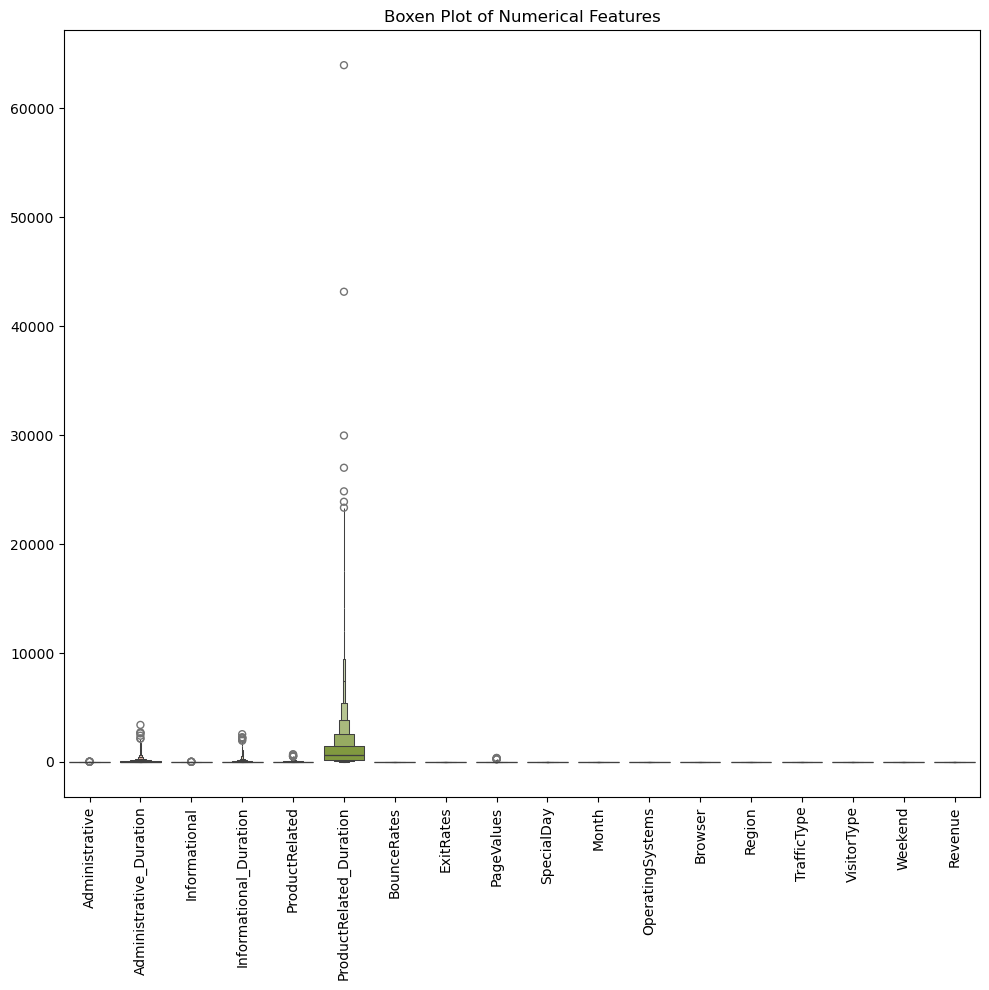

In [9]:
# Checking BoxenPlot 
plt.figure(figsize=(10, 10))
sns.boxenplot(data= df)

plt.xticks(rotation = 90)  
plt.title("Boxen Plot of Numerical Features")
plt.tight_layout()
plt.show()

In [10]:
# Creating Our First Log
logging.info('Outlier Detection and Replacing of Outlier Activity Done Using IQR Method.')

In [11]:
# Replace Outliers with Median Statergy

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_count = outliers.sum()

    if outlier_count > 0:
        replacement = df[col].median()  
        df.loc[outliers, col] = replacement
        print(f"Replaced {outlier_count} outliers in '{col}' with median.")
    else:
        print(f"No outliers found in '{col}'.")

Replaced 404 outliers in 'Administrative' with median.
Replaced 1172 outliers in 'Administrative_Duration' with median.
Replaced 2631 outliers in 'Informational' with median.
Replaced 2405 outliers in 'Informational_Duration' with median.
Replaced 987 outliers in 'ProductRelated' with median.
Replaced 961 outliers in 'ProductRelated_Duration' with median.
Replaced 1551 outliers in 'BounceRates' with median.
Replaced 1099 outliers in 'ExitRates' with median.
Replaced 2730 outliers in 'PageValues' with median.
Replaced 1251 outliers in 'SpecialDay' with median.
Replaced 2160 outliers in 'Month' with median.
Replaced 111 outliers in 'OperatingSystems' with median.
Replaced 4369 outliers in 'Browser' with median.
Replaced 511 outliers in 'Region' with median.
Replaced 2101 outliers in 'TrafficType' with median.
Replaced 1779 outliers in 'VisitorType' with median.
Replaced 2868 outliers in 'Weekend' with median.
Replaced 1908 outliers in 'Revenue' with median.


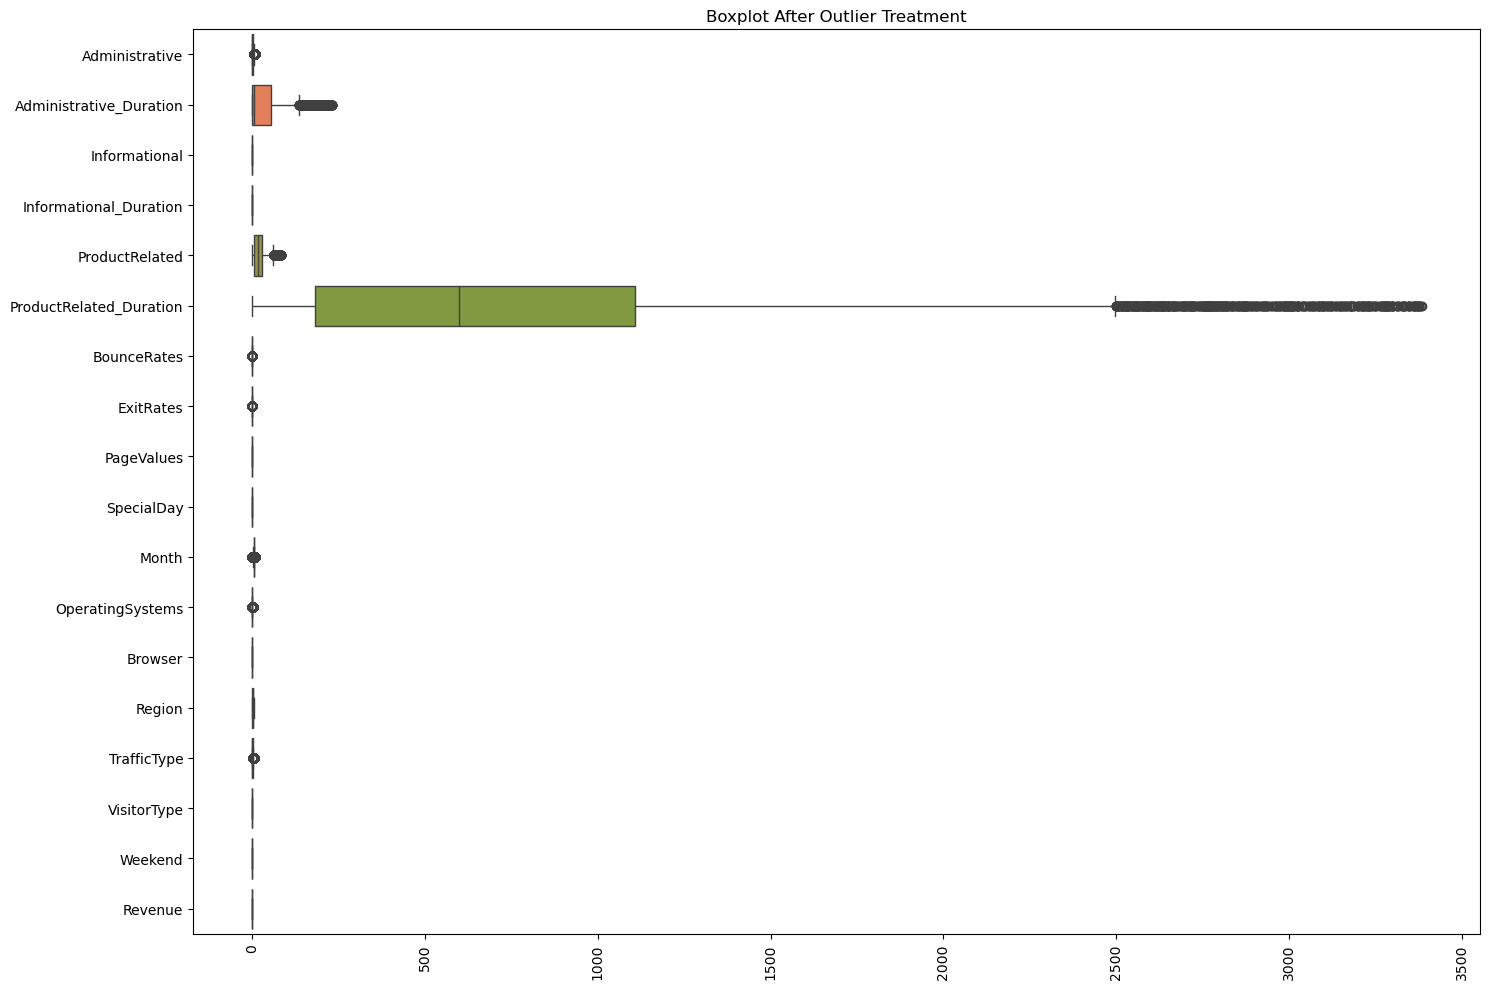

In [12]:
# Set figure size
plt.figure(figsize=(15, 10))

# Create boxplot for all numerical columns
sns.boxplot(data=df, orient='h')

# Set title
plt.xticks(rotation = 90)  
plt.title('Boxplot After Outlier Treatment')
plt.tight_layout()
plt.show()

In [13]:
# Creating Our First Log
logging.info('Outlier Detection and Replacing of Outlier Activity Done Using IQR Method.')

In [14]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

<Axes: >

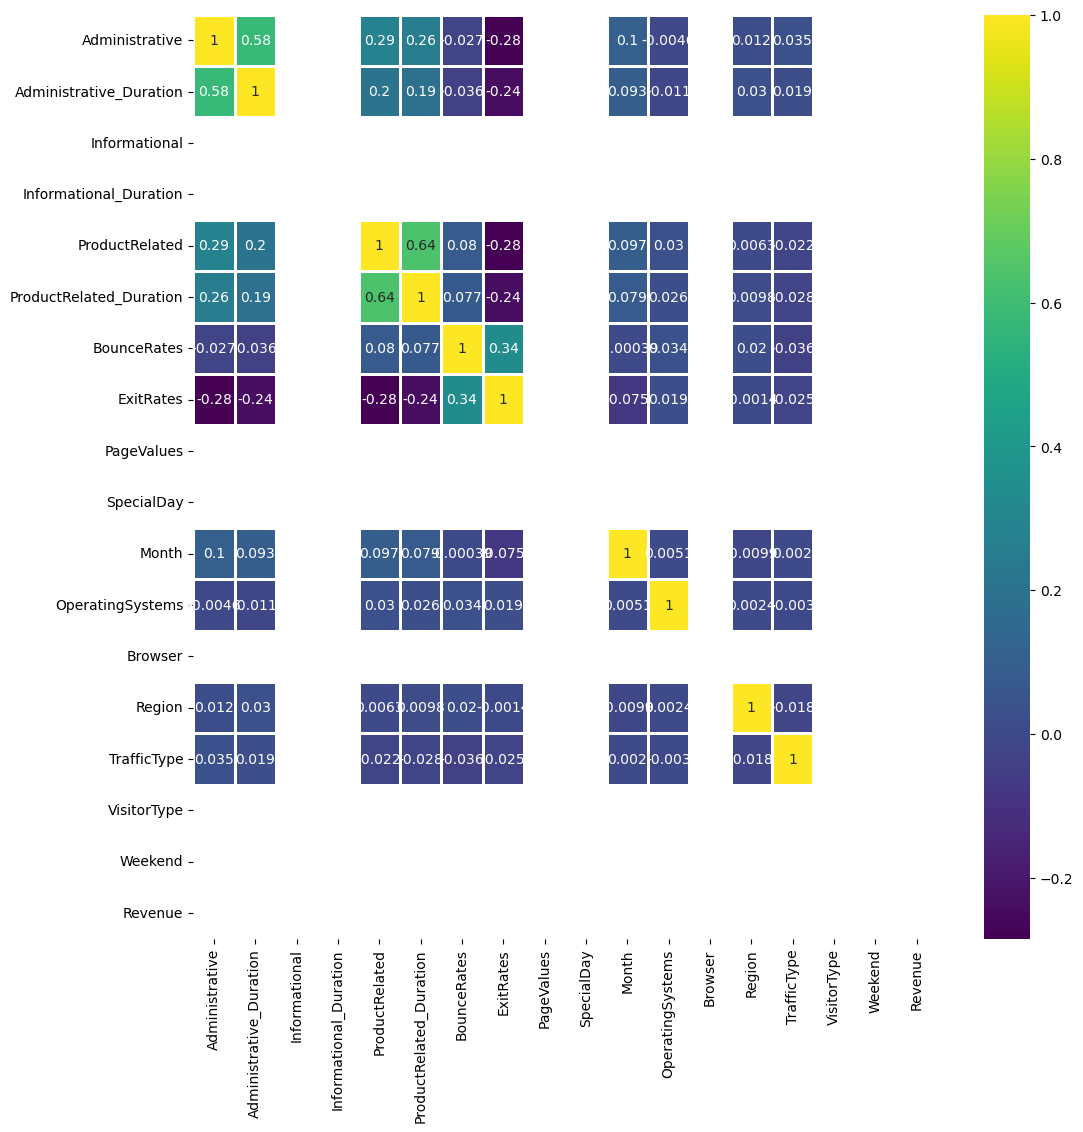

In [15]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot =True,cmap='viridis',linewidths=1)

In [16]:
# Splitting the dataset into features (X) and target (y) variables

X = df.drop(columns=['Revenue'])

y = df['Revenue']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.20, random_state=42)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)


from sklearn.metrics import accuracy_score
accuracy_score_LR = accuracy_score(y_test,y_pred)
accuracy_score_LR

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.